Dataset yang digunakan adalah dataset World Happiness Report pada 138 negara pada tahun 2020.


*   Link Dataset: https://www.kaggle.com/yamaerenay/world-happiness-report-preprocessed
    
Pendekatan klasifikasi yang akan digunakan adalah dengan SVM. Tujuannya adalah mengklasifikan apakah negara tersebut memiliki skor kebahagian di atas rata-rata atau tidak.

Import Library

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

Read Dataset

In [ ]:
df_2015 = pd.read_csv("2015_report.csv", delimiter=",")
df_2015 = df_2015.rename(columns={"family":"social_support"})
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            138 non-null    object 
 1   happiness_score    138 non-null    float64
 2   gdp_per_capita     138 non-null    float64
 3   social_support     138 non-null    float64
 4   health             138 non-null    float64
 5   freedom            138 non-null    float64
 6   generosity         138 non-null    float64
 7   government_trust   138 non-null    float64
 8   dystopia_residual  138 non-null    float64
 9   continent          138 non-null    object 
dtypes: float64(8), object(2)
memory usage: 10.9+ KB


In [ ]:
df_2016 = pd.read_csv("2016_report.csv", delimiter=",")
df_2016 = df_2016.rename(columns={"family":"social_support"})
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            138 non-null    object 
 1   happiness_score    138 non-null    float64
 2   gdp_per_capita     138 non-null    float64
 3   social_support     138 non-null    float64
 4   health             138 non-null    float64
 5   freedom            138 non-null    float64
 6   government_trust   138 non-null    float64
 7   generosity         138 non-null    float64
 8   dystopia_residual  138 non-null    float64
 9   continent          138 non-null    object 
dtypes: float64(8), object(2)
memory usage: 10.9+ KB


In [ ]:
df_2017 = pd.read_csv("2017_report.csv", delimiter=",")
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           138 non-null    object 
 1   happiness_score   138 non-null    float64
 2   gdp_per_capita    138 non-null    float64
 3   social_support    138 non-null    float64
 4   health            138 non-null    float64
 5   freedom           138 non-null    float64
 6   generosity        138 non-null    float64
 7   government_trust  138 non-null    float64
 8   continent         138 non-null    object 
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [ ]:
df_2018 = pd.read_csv("2018_report.csv", delimiter=",")
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           138 non-null    object 
 1   happiness_score   138 non-null    float64
 2   gdp_per_capita    138 non-null    float64
 3   social_support    138 non-null    float64
 4   health            138 non-null    float64
 5   freedom           138 non-null    float64
 6   generosity        138 non-null    float64
 7   government_trust  138 non-null    float64
 8   continent         138 non-null    object 
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [ ]:
df_2019 = pd.read_csv("2019_report.csv", delimiter=",")
df_2019 = df_2019.rename(columns={"family":"social_support"})
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            138 non-null    object 
 1   happiness_score    138 non-null    float64
 2   gdp_per_capita     138 non-null    float64
 3   social_support     138 non-null    float64
 4   health             138 non-null    float64
 5   freedom            138 non-null    float64
 6   government_trust   138 non-null    float64
 7   generosity         138 non-null    float64
 8   dystopia_residual  138 non-null    float64
 9   continent          138 non-null    object 
dtypes: float64(8), object(2)
memory usage: 10.9+ KB


In [ ]:
df_2020 = pd.read_csv("2020_report.csv", delimiter=",")
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            138 non-null    object 
 1   happiness_score    138 non-null    float64
 2   gdp_per_capita     138 non-null    float64
 3   social_support     138 non-null    float64
 4   health             138 non-null    float64
 5   freedom            138 non-null    float64
 6   generosity         138 non-null    float64
 7   government_trust   138 non-null    float64
 8   dystopia_residual  138 non-null    float64
 9   continent          138 non-null    object 
dtypes: float64(8), object(2)
memory usage: 10.9+ KB


In [ ]:
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            828 non-null    object 
 1   happiness_score    828 non-null    float64
 2   gdp_per_capita     828 non-null    float64
 3   social_support     828 non-null    float64
 4   health             828 non-null    float64
 5   freedom            828 non-null    float64
 6   generosity         828 non-null    float64
 7   government_trust   828 non-null    float64
 8   dystopia_residual  552 non-null    float64
 9   continent          828 non-null    object 
dtypes: float64(8), object(2)
memory usage: 64.8+ KB


# Preprocessing
Karena bentuk dari kolom happiness_score berupa value maka dikategorikan terlebih dahulu dengan cara menghitung mean dari happiness_score dan mengkategorikannya menjadi apakah di atas rata-rata atau tidak. Dataframe ditambahkan kolom baru ("above_average") dengan isinya jika di atas mean adalah "Yes", jika di bawah rata-rata isinya "No".

In [ ]:
print("Jumlah baris yang memiliki value NaN pada tiap kolom: \n")
df.isnull().sum()

Jumlah baris yang memiliki value NaN pada tiap kolom: 



country                0
happiness_score        0
gdp_per_capita         0
social_support         0
health                 0
freedom                0
generosity             0
government_trust       0
dystopia_residual    276
continent              0
dtype: int64

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
print("Jumlah baris yang memiliki value NaN pada tiap kolom: \n")
df.isnull().sum()

Jumlah baris yang memiliki value NaN pada tiap kolom: 



country              0
happiness_score      0
gdp_per_capita       0
social_support       0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            552 non-null    object 
 1   happiness_score    552 non-null    float64
 2   gdp_per_capita     552 non-null    float64
 3   social_support     552 non-null    float64
 4   health             552 non-null    float64
 5   freedom            552 non-null    float64
 6   generosity         552 non-null    float64
 7   government_trust   552 non-null    float64
 8   dystopia_residual  552 non-null    float64
 9   continent          552 non-null    object 
dtypes: float64(8), object(2)
memory usage: 43.2+ KB


In [ ]:
df = df.drop(columns=['country', 'continent'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   happiness_score    552 non-null    float64
 1   gdp_per_capita     552 non-null    float64
 2   social_support     552 non-null    float64
 3   health             552 non-null    float64
 4   freedom            552 non-null    float64
 5   generosity         552 non-null    float64
 6   government_trust   552 non-null    float64
 7   dystopia_residual  552 non-null    float64
dtypes: float64(8)
memory usage: 34.6 KB


In [ ]:
mean_happiness_score = df['happiness_score'].mean()
print("Rata-rata happiness skor : ", mean_happiness_score)

Rata-rata happiness skor :  5.448621736687125


In [ ]:
df.loc[:,'above_average'] = 'Yes'
df.loc[df['happiness_score'] <= mean_happiness_score, 'above_average'] = 'No'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   happiness_score    552 non-null    float64
 1   gdp_per_capita     552 non-null    float64
 2   social_support     552 non-null    float64
 3   health             552 non-null    float64
 4   freedom            552 non-null    float64
 5   generosity         552 non-null    float64
 6   government_trust   552 non-null    float64
 7   dystopia_residual  552 non-null    float64
 8   above_average      552 non-null    object 
dtypes: float64(8), object(1)
memory usage: 38.9+ KB


In [ ]:
X = df[['gdp_per_capita', 'social_support', 'health', 'freedom', 'generosity', 'government_trust', 'dystopia_residual']].values
X[0:5]

array([[1.61646318, 1.53352356, 0.7966665 , 0.63542259, 0.36201224,
        0.31596383, 2.27702665],
       [1.48238301, 1.55112159, 0.79256552, 0.62600672, 0.35528049,
        0.40077007, 2.31370735],
       [1.48063302, 1.61057401, 0.83355212, 0.62716264, 0.47554022,
        0.15352656, 2.32271528],
       [1.56497955, 1.51691175, 0.85813129, 0.62007058, 0.29054928,
        0.36700729, 2.27671623],
       [1.44357193, 1.54024673, 0.80915767, 0.61795086, 0.24548277,
        0.38261154, 2.4301815 ]])

In [ ]:
Y = df['above_average']
Y[0:5]

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: above_average, dtype: object

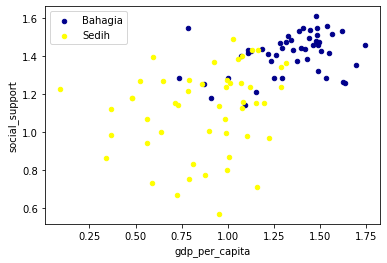

In [ ]:
ax = df[df['above_average'] == 'Yes'][0:50].plot(kind='scatter', x='gdp_per_capita', y='social_support', color='DarkBlue', label='Bahagia');
df[df['above_average'] == 'No'][0:50].plot(kind='scatter', x='gdp_per_capita', y='social_support', color='Yellow', label='Sedih', ax=ax);
plt.show()

Tetapkan kolom selain happiness_score dan above_average sebagai feature matrix (X)

Ubah categorical value dari kolom "continent" menjadi integer value

Tetapkan Y sebagai target, yaitu kolom 'above_average'

# Train/Test Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (441, 7) (441,)
Test set: (111, 7) (111,)


# Modeling
Pada modeling ini menggunakan kernel Radial basis function (RBF), pertama data di fit terlebih dahulu

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

Setelah difit maka bisa digunakan untuk prediksi nilai baru

In [ ]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['No', 'No', 'No', 'No', 'Yes'], dtype=object)

## Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

          No       1.00      0.92      0.96        61
         Yes       0.91      1.00      0.95        50

    accuracy                           0.95       111
   macro avg       0.95      0.96      0.95       111
weighted avg       0.96      0.95      0.96       111

Confusion matrix, without normalization
[[50  0]
 [ 5 56]]


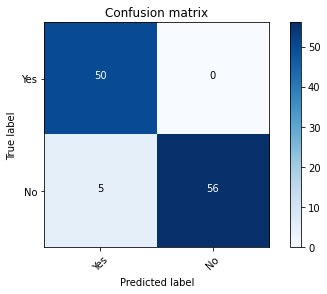

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['Yes', 'No'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

Mencari f1 score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.955064955064955

Mencari Jaccard score

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label='Yes')

0.9090909090909091

In [ ]:
jaccard_score(y_test, yhat, pos_label='No')

0.9180327868852459

# Skenario 1 (Standard Scaler)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
print(np.mean(X_standard))
print(np.std(X_standard))

-1.1768823780705594e-16
1.0


In [ ]:
X_trainset_std, X_testset_std, y_trainset_std, y_testset_std = train_test_split(X_standard, Y, test_size=0.2, random_state=4)
print(X_trainset_std.shape)
print(X_testset_std.shape)

(441, 7)
(111, 7)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset_std, y_trainset_std)

SVC()

In [ ]:
yhat = clf.predict(X_testset_std)
yhat [0:5]

array(['No', 'No', 'No', 'No', 'Yes'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
print(classification_report(y_testset_std, yhat))

              precision    recall  f1-score   support

          No       1.00      0.97      0.98        61
         Yes       0.96      1.00      0.98        50

    accuracy                           0.98       111
   macro avg       0.98      0.98      0.98       111
weighted avg       0.98      0.98      0.98       111



# MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [ ]:
print(np.mean(X_minmax))
print(np.std(X_minmax))

0.4835926816926423
0.2471003445386041


In [ ]:
X_trainset_mm, X_testset_mm, y_trainset_mm, y_testset_mm = train_test_split(X_minmax, Y, test_size=0.2, random_state=4)
print(X_trainset_mm.shape)
print(X_testset_mm.shape)

(441, 7)
(111, 7)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset_mm, y_trainset_mm)

SVC()

In [ ]:
yhat = clf.predict(X_testset_mm)
yhat [0:5]

array(['No', 'No', 'No', 'No', 'Yes'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
print(classification_report(y_testset_mm, yhat))

              precision    recall  f1-score   support

          No       1.00      0.97      0.98        61
         Yes       0.96      1.00      0.98        50

    accuracy                           0.98       111
   macro avg       0.98      0.98      0.98       111
weighted avg       0.98      0.98      0.98       111



# Grid Search


In [ ]:
X = df[['gdp_per_capita', 'social_support', 'health', 'freedom', 'generosity', 'government_trust', 'dystopia_residual']].values
X[0:5]

array([[1.62, 1.53, 0.8 , 0.64, 0.36, 0.32, 2.28],
       [1.48, 1.55, 0.79, 0.63, 0.36, 0.4 , 2.31],
       [1.48, 1.61, 0.83, 0.63, 0.48, 0.15, 2.32],
       [1.56, 1.52, 0.86, 0.62, 0.29, 0.37, 2.28],
       [1.44, 1.54, 0.81, 0.62, 0.25, 0.38, 2.43]])

In [ ]:
Y = df['above_average']
Y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
547     No
548     No
549     No
550     No
551     No
Name: above_average, Length: 552, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.2, random_state=4)
print("Trainset: ", X_trainset.shape)
print("Testset: ", X_testset.shape)

Trainset:  (441, 7)
Testset:  (111, 7)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset)

SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_trainset, y_trainset)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.978 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.977 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.977 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.989 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.966 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.966 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.966 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.977 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.506 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [ ]:
grid_predictions = grid.predict(X_testset)
 
# print classification report
print(classification_report(y_testset, grid_predictions))

              precision    recall  f1-score   support

          No       1.00      0.95      0.97        61
         Yes       0.94      1.00      0.97        50

    accuracy                           0.97       111
   macro avg       0.97      0.98      0.97       111
weighted avg       0.97      0.97      0.97       111



# Feature Importance

In [ ]:
from sklearn import svm
svm = svm.SVC(gamma=0.001, C=100., kernel = 'linear')

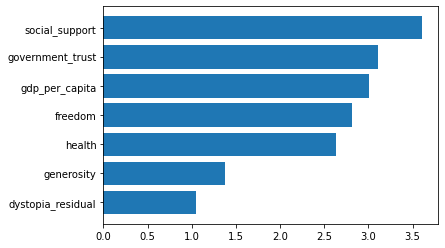

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['gdp_per_capita', 'social_support', 'health', 'freedom', 'generosity', 'dystopia_residual', 'government_trust']
svm = svm.SVC(kernel='linear')
svm.fit(X, Y)
f_importances(svm.coef_[0], features_names)

In [ ]:
X = df[['gdp_per_capita', 'social_support', 'health', 'freedom', 'generosity', 'government_trust']].values
X[0:5]

array([[1.62, 1.53, 0.8 , 0.64, 0.36, 0.32],
       [1.48, 1.55, 0.79, 0.63, 0.36, 0.4 ],
       [1.48, 1.61, 0.83, 0.63, 0.48, 0.15],
       [1.56, 1.52, 0.86, 0.62, 0.29, 0.37],
       [1.44, 1.54, 0.81, 0.62, 0.25, 0.38]])

In [ ]:
Y = df['above_average']
Y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
547     No
548     No
549     No
550     No
551     No
Name: above_average, Length: 552, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.2, random_state=4)
print("Trainset: ", X_trainset.shape)
print("Testset: ", X_trainset.shape)

Trainset:  (441, 6)
Testset:  (441, 6)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainset, y_trainset)

SVC()

In [ ]:
yhat = clf.predict(X_testset)
yhat [0:5]

array(['No', 'No', 'No', 'Yes', 'No'], dtype=object)

              precision    recall  f1-score   support

          No       0.85      0.84      0.84        61
         Yes       0.80      0.82      0.81        50

    accuracy                           0.83       111
   macro avg       0.83      0.83      0.83       111
weighted avg       0.83      0.83      0.83       111

Confusion matrix, without normalization
[[41  9]
 [10 51]]


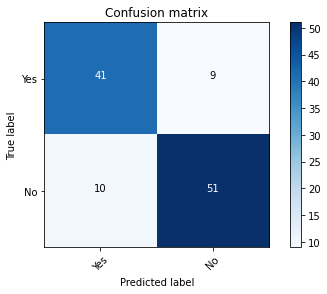

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhat, labels=['Yes', 'No'])
np.set_printoptions(precision=2)

print (classification_report(y_testset, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Yes','No'],normalize= False,  title='Confusion matrix')

# Gabungan

In [ ]:
X_last = df[['gdp_per_capita', 'social_support', 'health', 'freedom', 'generosity', 'government_trust']].values
X_last[0:5]
Y_last = df['above_average']
Y_last[0:5]

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: above_average, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_last = scaler.fit_transform(X_last)
print(np.mean(X_last))
print(np.std(X_last))

-7.937826456257157e-17
1.0


In [ ]:
X_trainset_last, X_testset_last, y_trainset_last, y_testset_last = train_test_split(X_last, Y_last, test_size=0.2, random_state=4)
print("Trainset: ", X_trainset_last.shape)
print("Testset: ", X_testset_last.shape)

Trainset:  (441, 6)
Testset:  (111, 6)


In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_trainset_last, y_trainset_last)
grid_predictions = grid.predict(X_testset_last)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.864 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.841 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.899 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.852 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.876 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
print(classification_report(y_testset_last, grid_predictions))

              precision    recall  f1-score   support

          No       0.86      0.84      0.85        61
         Yes       0.81      0.84      0.82        50

    accuracy                           0.84       111
   macro avg       0.84      0.84      0.84       111
weighted avg       0.84      0.84      0.84       111

